## Vasundhra Bisht

## Task 6 - Prediction using Decision Tree Algorithm

### Importing the dataset into a pandas dataframe 

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_080533e61ad54b02b084b57c003da841 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_080533e61ad54b02b084b57c003da841 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_080533e61ad54b02b084b57c003da841 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_IVktgeeKq9w2As4PEDGgXJZ_kVfFmc69TN0E0Igc5wS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_080533e61ad54b02b084b57c003da841)

body = client_080533e61ad54b02b084b57c003da841.get_object(Bucket='grip-donotdelete-pr-naqvlenqwwmxhx',Key='Iris.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.drop("Id",axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Importing all the required libraries 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

### Checking if the dataset has any null values

In [4]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Defining the target variable (Species) and features

In [5]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis =1)

### Target has categorical variables stored in it so we will encode it in numeric values for working.

In [6]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Splitting the data into training and testing sets 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df1 , target, test_size = 0.2, random_state = 42)

### Defining the decision tree algorithm

In [8]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

### Predicting the values of test data 

In [9]:
y_pred = dtree.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###   We got an accuracy of 100% on the testing dataset of 100 records. 

### Visualizing the decision tree 

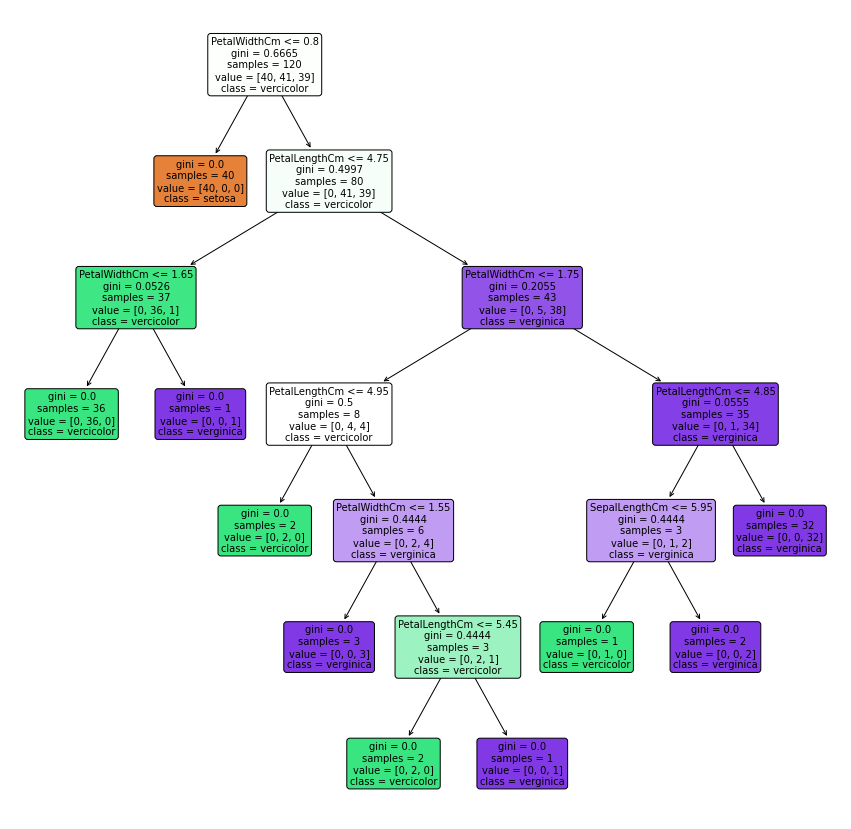

In [12]:
plt.figure(figsize=(15,15))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)
plt.show()

### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly. 